      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  


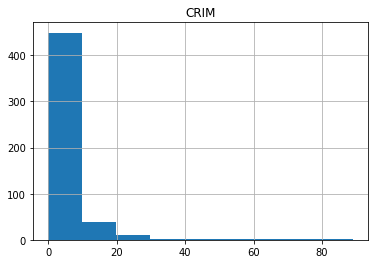

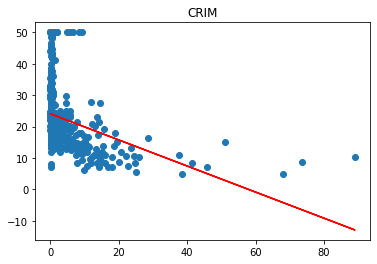

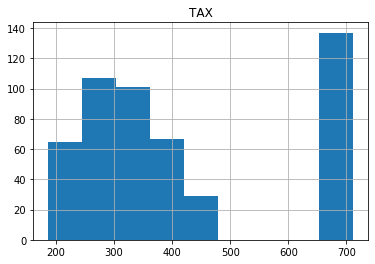

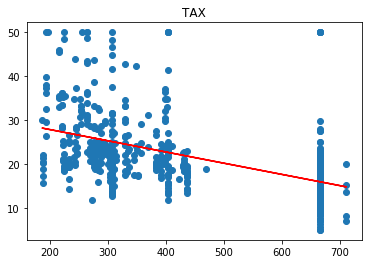

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression


if __name__ == '__main__':
    boston_data = load_boston()
    data = np.array(boston_data['data'])
    columns = np.array(boston_data['feature_names'])
    target = np.array(boston_data['target'])
    df = pd.DataFrame(data=data, columns=columns)
    print(df.head())
    
    for col in (columns[0], columns[9]):
        hist = df.hist(column=col, bins=9)
        col_data = df[col]
        reg = LinearRegression().fit(col_data.values.reshape(-1, 1), target)
        pred = reg.predict(col_data.values.reshape(-1, 1))
        
        plt.figure()
        plt.title(col)
        plt.scatter(col_data, target)
        plt.plot(col_data, pred, color='red')
    
    plt.show()


Results interpretation:

In both cases there is an depedency between the price and the parameter, but it is not a strong one. From the plot it can be read that Taxes as well as Crime rate is affecting price negatively, which is quite intuitive - the more crime and the higher taxes in the neighborhood, the lower are prices of houses. With all that it must be said, that linear regression is not ideal in both cases, especially in the Crime column plots, where with proper exponential function this column could be much better fitted. The problem is also in not evenly distributed data, what makes good fitting harder.